# IMPORTANT NOTICE

## This notebook requires a significant amount of time to run due to the extensive training of multiple models and optimization processes.

In [311]:
import pandas as pd

pd.set_option('display.max_columns', None)
raw_data = pd.read_csv('data/student_data.csv')
raw_data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
3996,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
3997,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
3998,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Data Cleaning and Preprocessing

### Checking for missing values

In [312]:
# Renaming some columns
raw_data.rename(columns={
    'Nacionality': 'Nationality',
    'Daytime/evening attendance\t': 'Daytime/evening attendance'
    }, inplace=True)

In [313]:
raw_data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [314]:
data = raw_data.copy()
data = data[data['Target'] != 'Enrolled']
data['Target'] = data['Target'].map({'Graduate': 1, 'Dropout': 0})
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
3996,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
3997,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
3998,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [315]:
data['Target']

0       0
1       1
2       0
3       1
4       1
       ..
3995    1
3996    0
3997    0
3998    1
3999    1
Name: Target, Length: 3295, dtype: int64

### Visualization

In [316]:
import seaborn as sns
import matplotlib.pyplot as plt

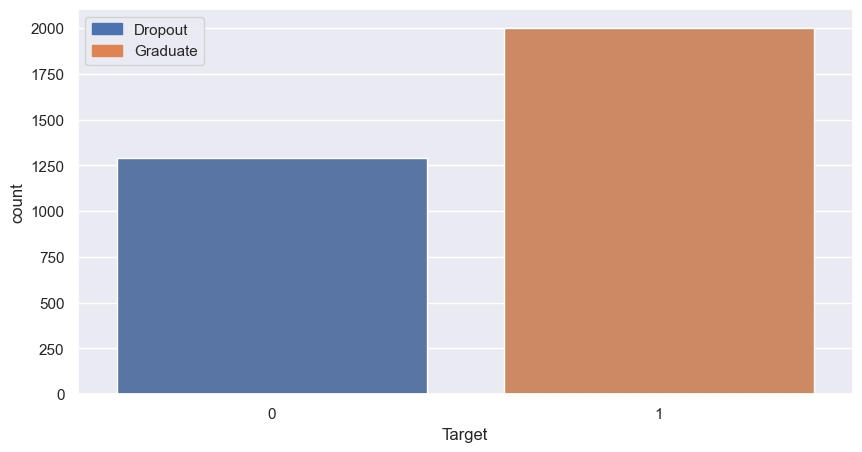

In [317]:
# Target column

sns.set(rc={'figure.figsize': (10, 5)})
ax = sns.countplot(x=data['Target'])

# Add legend
legend_labels = {'Dropout': 0, 'Graduate': 1}
palette = sns.color_palette()[:len(legend_labels)]
handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(len(legend_labels))]
ax.legend(handles, legend_labels.keys())

# Show the plot
plt.show()

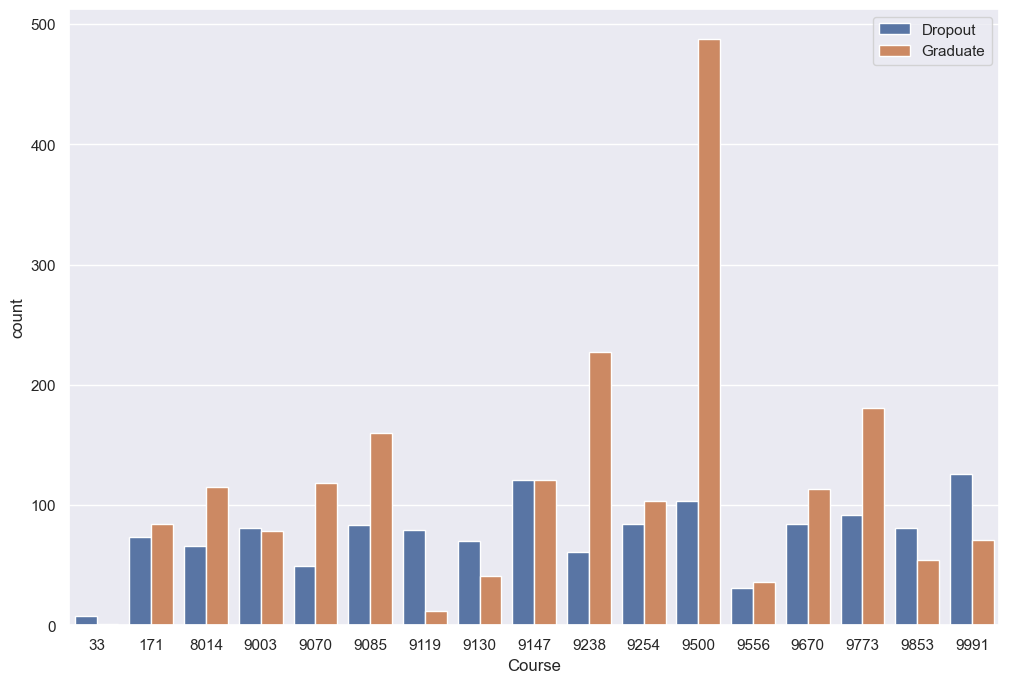

In [318]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.countplot(x=data['Course'], hue=data['Target'])

# Set legend labels
legend_labels = {0: 'Dropout', 1: 'Graduate'}
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels.values())

# Show the plot
plt.show()

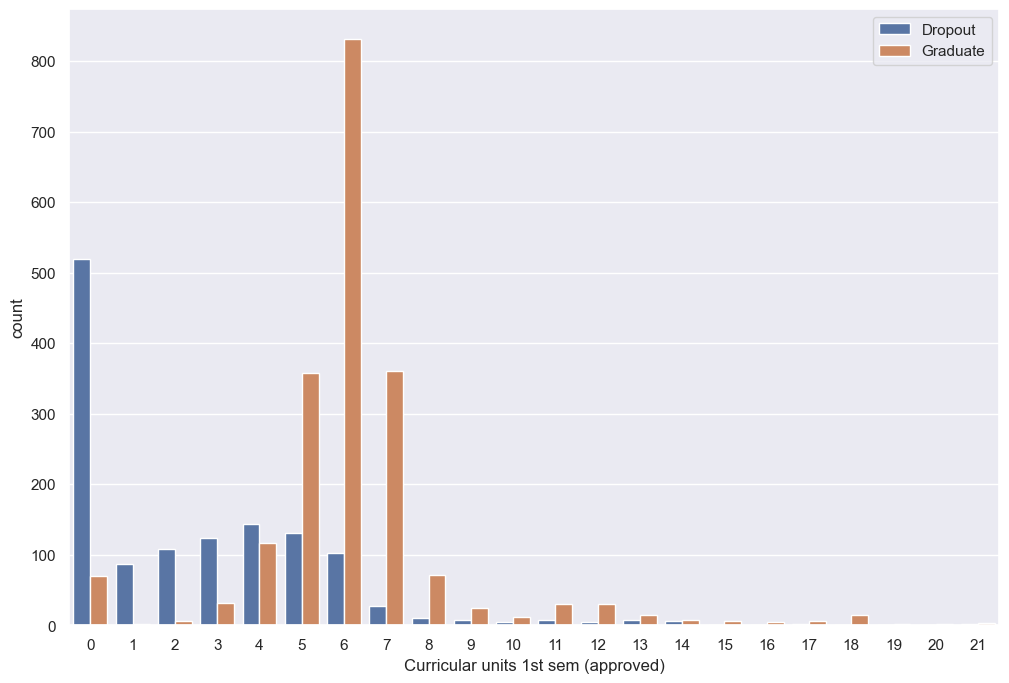

In [319]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.countplot(x=data['Curricular units 1st sem (approved)'], hue=data['Target'])

# Set legend labels
legend_labels = {0: 'Dropout', 1: 'Graduate'}
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels.values())

# Show the plot
plt.show()

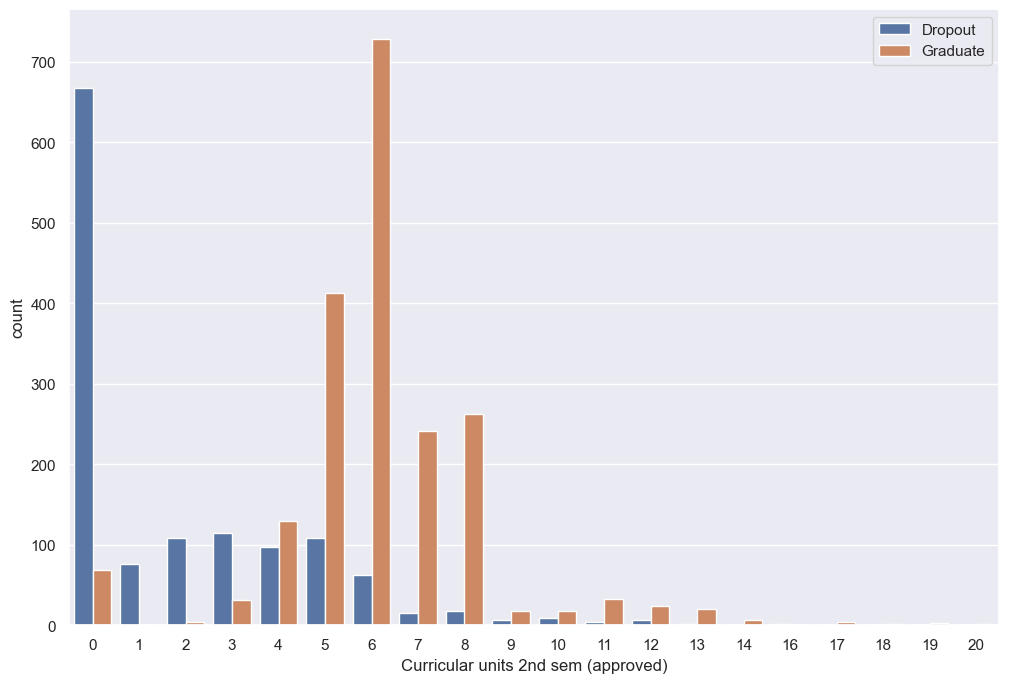

In [320]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.countplot(x=data['Curricular units 2nd sem (approved)'], hue=data['Target'])

# Set legend labels
legend_labels = {0: 'Dropout', 1: 'Graduate'}
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels.values())

# Show the plot
plt.show()

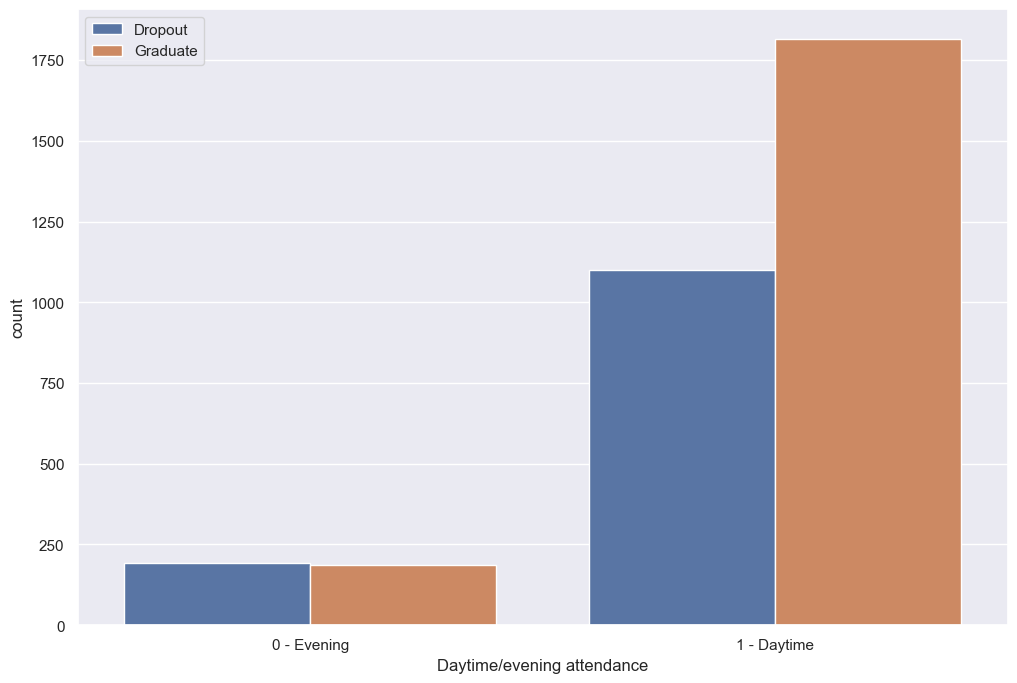

In [321]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.countplot(x=data['Daytime/evening attendance'], hue=data['Target'])

# Set legend labels
legend_labels = {0: 'Dropout', 1: 'Graduate'}
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels.values())

# Set x-axis tick labels
tick_labels = {0: '0 - Evening', 1: '1 - Daytime'}
plt.xticks(list(tick_labels.keys()), list(tick_labels.values()))

# Show the plot
plt.show()

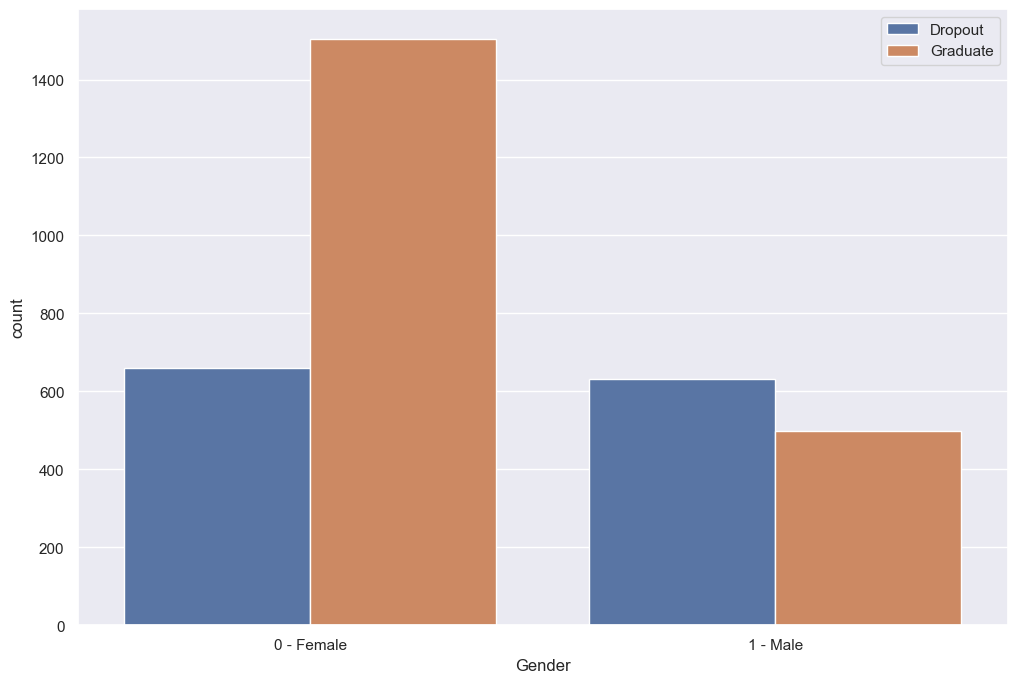

In [322]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.countplot(x=data['Gender'], hue=data['Target'])

# Set legend labels
legend_labels = {0: 'Dropout', 1: 'Graduate'}
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels.values())

# Set x-axis tick labels
tick_labels = {0: '0 - Female', 1: '1 - Male'}
plt.xticks(list(tick_labels.keys()), list(tick_labels.values()))

# Show the plot
plt.show()

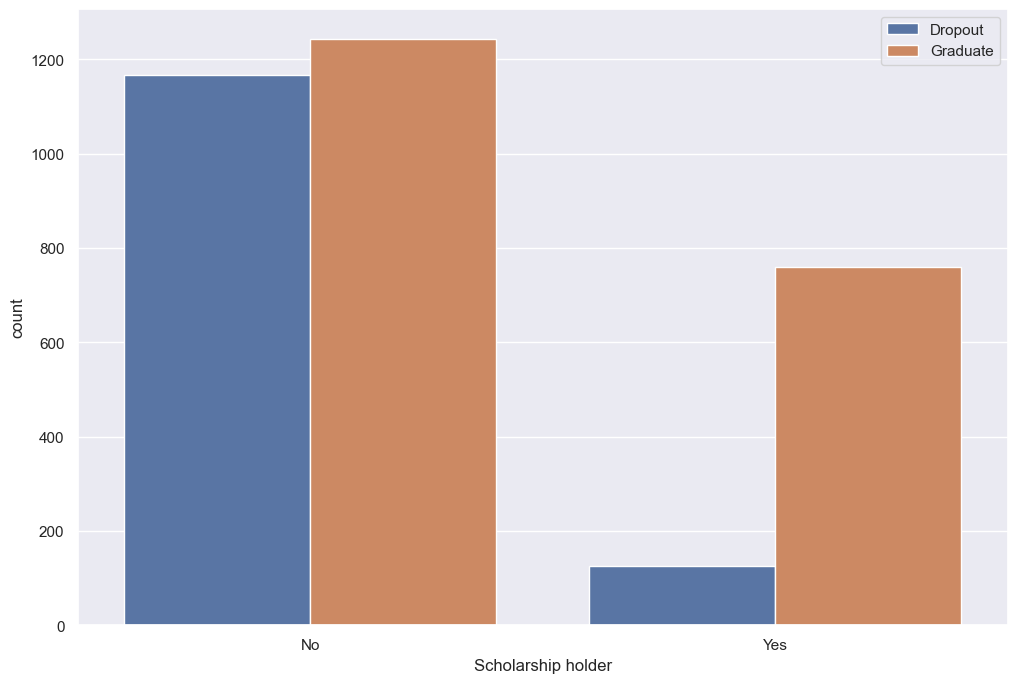

In [323]:
sns.set(rc={'figure.figsize':(12, 8)})
ax = sns.countplot(x=data['Scholarship holder'], hue=data['Target'])

# Set legend labels
legend_labels = {0: 'Dropout', 1: 'Graduate'}
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels.values())

# Set x-axis tick labels
tick_labels = {0: 'No', 1: 'Yes'}
plt.xticks(list(tick_labels.keys()), list(tick_labels.values()))

# Show the plot
plt.show()

# Correlation

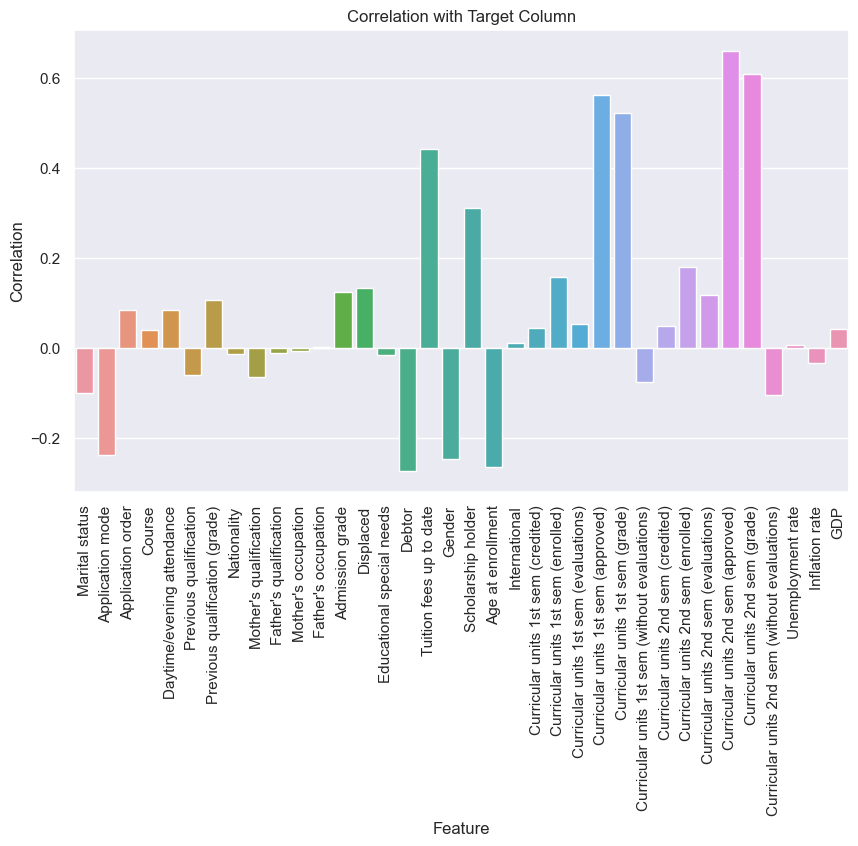

The most interesting correlation is between 'Curricular units 2nd sem (approved)' and the target column with a correlation value of 0.66.
This indicates a strong relationship between these two variables.


In [367]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix between features and the target column
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['Target'].drop('Target')  # Exclude the target column itself

# Plot the correlations with the target column
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title('Correlation with Target Column')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.show()

# Discuss the interesting correlation
most_correlated_feature = correlation_with_target.abs().idxmax()
correlation_value = correlation_with_target[most_correlated_feature]
discussion = f"The most interesting correlation is between '{most_correlated_feature}' and the target column with a correlation value of {correlation_value:.2f}.\nThis indicates a strong relationship between these two variables."
print(discussion)

##### Discussion

The most interesting correlation is between 'Curricular units 2nd sem (approved)' and the target column with a correlation value of 0.66. This indicates a strong relationship between the number of curricular units approved in the second semester and the student's graduation or dropout status.

A correlation value of 0.66 suggests a positive association between the number of approved curricular units in the second semester and the likelihood of a student being a graduate rather than a dropout. As the number of approved curricular units in the second semester increases, there is a higher probability of the student being classified as a graduate rather than a dropout.

This correlation implies that students who successfully complete more curricular units in the second semester are more likely to graduate rather than drop out. It indicates that academic performance and progress in the second semester play a significant role in determining the student's outcome.

Additionally, it is worth noting that a similar pattern can be observed for the correlation between the number of curricular units approved in the first semester and the student's graduation or dropout status. Although the correlation value for the first semester may differ, it also suggests a positive association between the number of approved curricular units in the first semester and the likelihood of being a graduate rather than a dropout.

This consistency across both semesters reinforces the importance of early academic success and progress in predicting a student's outcome. It suggests that students who perform well and achieve a higher number of approved curricular units in both the first and second semesters are more likely to graduate. On the other hand, students who struggle or have fewer approved curricular units in either semester may be at a higher risk of dropping out.

# Model training

In [324]:
from sklearn.metrics import accuracy_score

In [325]:
X = data.drop(columns=['Target'], axis=1)
y = data['Target']

In [326]:
X.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [327]:
y.head()

0    0
1    1
2    0
3    1
4    1
Name: Target, dtype: int64

In [328]:
from sklearn.model_selection import train_test_split

In [329]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [330]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2636, 36), (659, 36), (2636,), (659,))

### Training

##### Random Forest

In [331]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
training_acc_rf = accuracy_score(y_train, y_train_pred_rf)

y_test_pred_rf = rf.predict(X_test)
testing_acc_rf = accuracy_score(y_test, y_test_pred_rf)

In [332]:
# Training accuracy
training_acc_rf

1.0

In [333]:
# Testing accuracy
testing_acc_rf

0.9013657056145675

### Visualize RandomForest Correlations

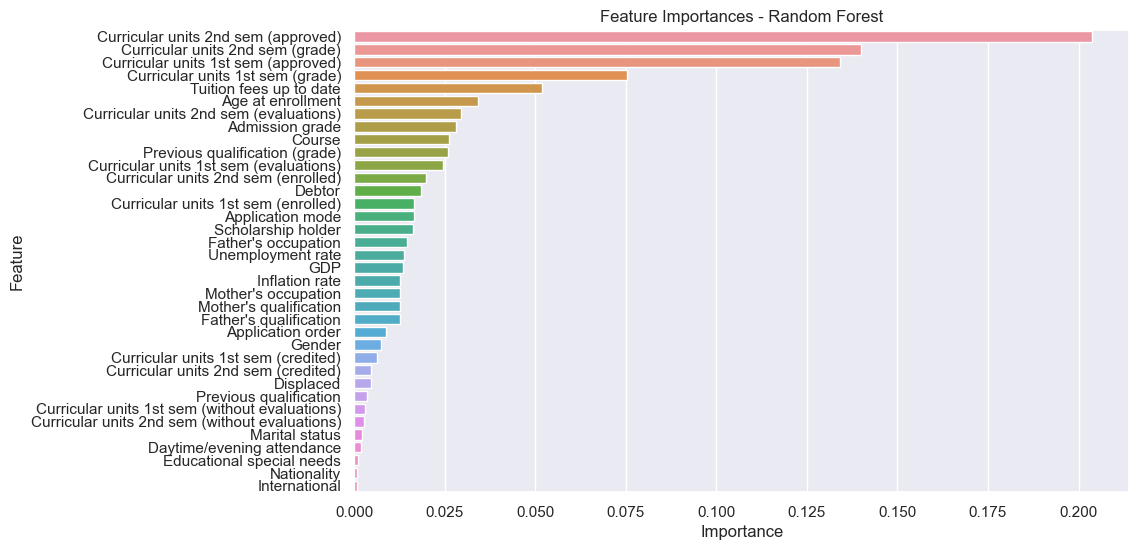

Training Accuracy: 1.0
Testing Accuracy: 0.9013657056145675


In [358]:
# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf.feature_importances_})

# Sort the DataFrame by feature importances in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the accuracy scores
print(f'Training Accuracy: {training_acc_rf}')
print(f'Testing Accuracy: {testing_acc_rf}')

In [334]:
from sklearn.model_selection import GridSearchCV

##### GridSearchCV optimization for RandomForest

In [335]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the data to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best estimator
best_rf = grid_search.best_estimator_

# Make predictions on the training and testing sets
y_train_pred_rf_gs = best_rf.predict(X_train)
y_test_pred_rf_gs = best_rf.predict(X_test)

# Calculate accuracy scores
training_acc_rf_gs = accuracy_score(y_train, y_train_pred_rf_gs)
testing_acc_rf_gs = accuracy_score(y_test, y_test_pred_rf_gs)

In [336]:
# Training accuracy
training_acc_rf_gs

0.9874810318664643

In [337]:
# Testing accuracy
testing_acc_rf_gs

0.9044006069802731

### Visualize RandomForest with GridSearchCV Correlations

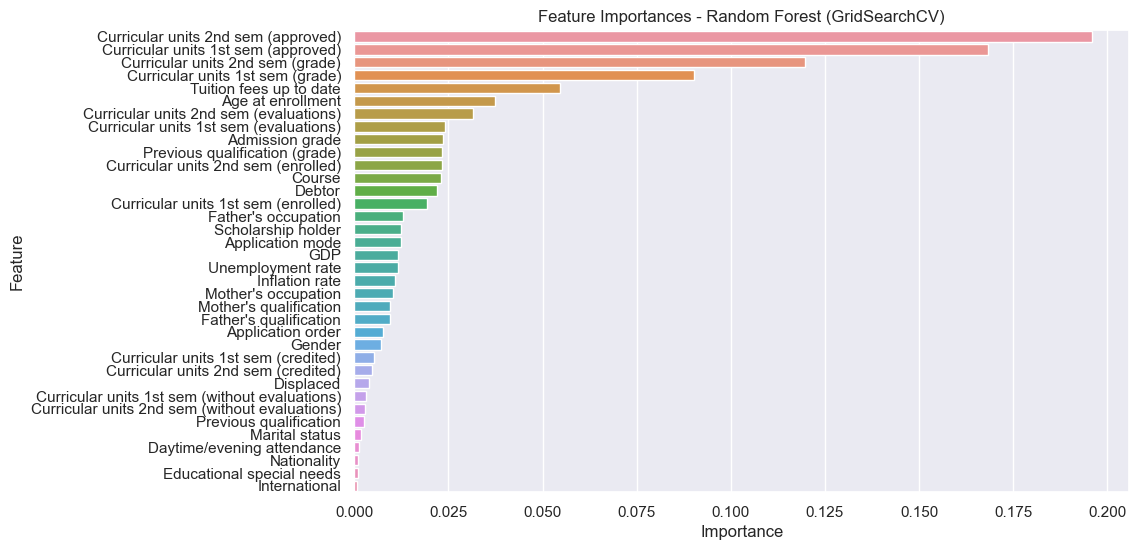

Training Accuracy (GridSearchCV): 0.9874810318664643
Testing Accuracy (GridSearchCV): 0.9044006069802731


In [359]:
# Create a DataFrame with feature names and importances for the best estimator
feature_importance_df_gs = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_rf.feature_importances_})

# Sort the DataFrame by feature importances in descending order
feature_importance_df_gs = feature_importance_df_gs.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances of the best estimator
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_gs)
plt.title('Feature Importances - Random Forest (GridSearchCV)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the accuracy scores
print(f'Training Accuracy (GridSearchCV): {training_acc_rf_gs}')
print(f'Testing Accuracy (GridSearchCV): {testing_acc_rf_gs}')

##### Decision Tree

In [338]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
training_acc_dt = accuracy_score(y_train, y_train_pred_dt)

y_test_pred_dt = dt.predict(X_test)
testing_acc_dt = accuracy_score(y_test, y_test_pred_dt)

In [339]:
# Training accuracy
training_acc_dt

1.0

In [340]:
# Testing accuracy
testing_acc_dt

0.8452200303490136

##### GridSearchCV optimization for DecisionTreeClassifier

In [341]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Fit the data to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best estimator
best_dt = grid_search.best_estimator_

# Make predictions on the training and testing sets
y_train_pred_dt_gs = best_dt.predict(X_train)
y_test_pred_dt_gs = best_dt.predict(X_test)

# Calculate accuracy scores
training_acc_dt_gs = accuracy_score(y_train, y_train_pred_dt_gs)
testing_acc_dt_gs = accuracy_score(y_test, y_test_pred_dt_gs)

In [342]:
# Training accuracy
training_acc_dt_gs

0.915402124430956

In [343]:
# Testing accuracy
testing_acc_dt_gs

0.8907435508345979

##### Logistic Regression

In [344]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict(X_train)
training_acc_lr = accuracy_score(y_train, y_train_pred_lr)

y_test_pred_lr = lr.predict(X_test)
testing_acc_lr = accuracy_score(y_test, y_test_pred_lr)

c:\Users\janha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [345]:
# Training accuracy
training_acc_lr

0.8622913505311077

In [346]:
# Testing accuracy
testing_acc_lr

0.8619119878603946

##### GridSearchCV optimization for LogisticRegression

In [347]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],            # Inverse of regularization strength
    'penalty': ['l1', 'l2']       # Regularization penalty
}

# Create the GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5)

# Fit the data to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best estimator
best_lr = grid_search.best_estimator_

# Make predictions on the training and testing sets
y_train_pred_lr_gs = best_lr.predict(X_train)
y_test_pred_lr_gs = best_lr.predict(X_test)

# Calculate accuracy scores
training_acc_lr_gs = accuracy_score(y_train, y_train_pred_lr_gs)
testing_acc_lr_gs = accuracy_score(y_test, y_test_pred_lr_gs)

c:\Users\janha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\janha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [348]:
# Training accuracy
training_acc_lr_gs

0.8653262518968133

In [349]:
# Testing accuracy
testing_acc_lr_gs

0.858877086494689

##### Support Vector Machine (SVM)

In [350]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_train_pred_svm = svm.predict(X_train)
training_acc_svm = accuracy_score(y_train, y_train_pred_svm)

y_test_pred_svm = svm.predict(X_test)
testing_acc_svm = accuracy_score(y_test, y_test_pred_svm)

In [351]:
# Training accuracy
training_acc_svm

0.6069802731411229

In [352]:
# Testing accuracy
testing_acc_svm

0.6115326251896813

##### GridSearchCV optimization for Support Vector Machine (SVM)

In [353]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],                  # Regularization parameter
    'kernel': ['linear', 'rbf'],        # Kernel function
    'gamma': ['scale', 'auto']          # Kernel coefficient
}

# Create the GridSearchCV object
grid_search = GridSearchCV(svm, param_grid, cv=5)

# Fit the data to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best estimator
best_svm = grid_search.best_estimator_

# Make predictions on the training and testing sets
y_train_pred_svm_gs = best_svm.predict(X_train)
y_test_pred_svm_gs = best_svm.predict(X_test)

# Calculate accuracy scores
training_acc_svm_gs = accuracy_score(y_train, y_train_pred_svm_gs)
testing_acc_svm_gs = accuracy_score(y_test, y_test_pred_svm_gs)

In [354]:
# Training accuracy
training_acc_svm_gs

0.9127465857359636

In [355]:
# Testing accuracy
testing_acc_svm_gs

0.9119878603945372

### Save Scores in DataFrame

In [356]:
# Create a dictionary with the accuracy scores
accuracy_scores = {
    'Model': ['RandomForest', 'RandomForestGridSearch', 'DecisionTree', 'DecisionTreeGridSearch', 
              'LogisticRegression', 'LogisticRegressionGridSearch', 'SVM', 'SVMGridSearch'],
    'Training Accuracy': [training_acc_rf, training_acc_rf_gs, training_acc_dt, training_acc_dt_gs,
                           training_acc_lr, training_acc_lr_gs, training_acc_svm, training_acc_svm_gs],
    'Testing Accuracy': [testing_acc_rf, testing_acc_rf_gs, testing_acc_dt, testing_acc_dt_gs,
                          testing_acc_lr, testing_acc_lr_gs, testing_acc_svm, testing_acc_svm_gs]
}

# Create a DataFrame from the accuracy scores dictionary
accuracy_df = pd.DataFrame(accuracy_scores)

# Display the accuracy DataFrame
print(accuracy_df)

                          Model  Training Accuracy  Testing Accuracy
0                  RandomForest           1.000000          0.901366
1        RandomForestGridSearch           0.987481          0.904401
2                  DecisionTree           1.000000          0.845220
3        DecisionTreeGridSearch           0.915402          0.890744
4            LogisticRegression           0.862291          0.861912
5  LogisticRegressionGridSearch           0.865326          0.858877
6                           SVM           0.606980          0.611533
7                 SVMGridSearch           0.912747          0.911988


### Graph Model Performances

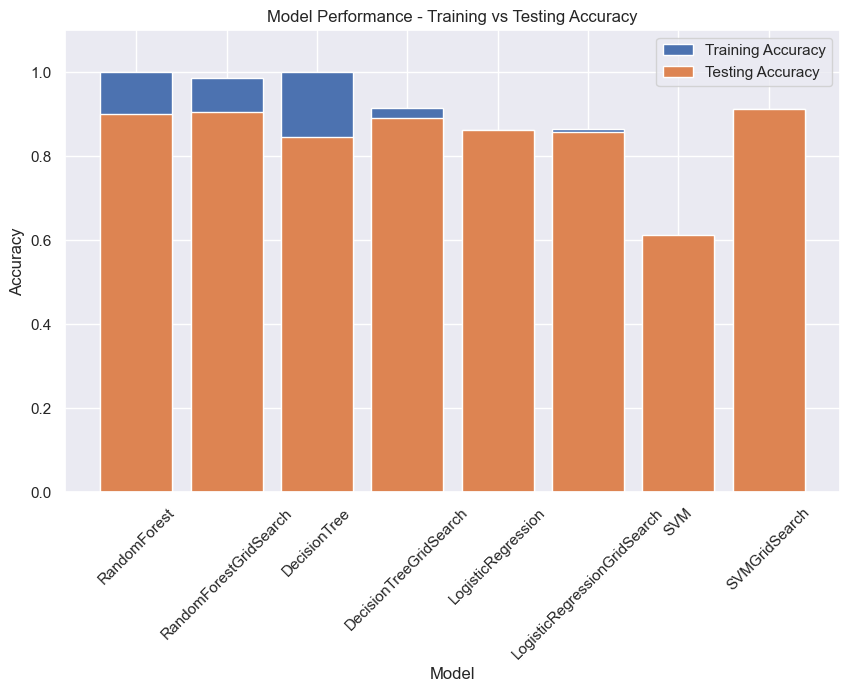

In [360]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
models = ['RandomForest', 'RandomForestGridSearch', 'DecisionTree', 'DecisionTreeGridSearch',
          'LogisticRegression', 'LogisticRegressionGridSearch', 'SVM', 'SVMGridSearch']
training_acc = [training_acc_rf, training_acc_rf_gs, training_acc_dt, training_acc_dt_gs,
                training_acc_lr, training_acc_lr_gs, training_acc_svm, training_acc_svm_gs]
testing_acc = [testing_acc_rf, testing_acc_rf_gs, testing_acc_dt, testing_acc_dt_gs,
               testing_acc_lr, testing_acc_lr_gs, testing_acc_svm, testing_acc_svm_gs]

# Plotting the performance
plt.figure(figsize=(10, 6))
plt.bar(models, training_acc, label='Training Accuracy')
plt.bar(models, testing_acc, label='Testing Accuracy')
plt.title('Model Performance - Training vs Testing Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1.1])
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Additional RandomForest (GridSearchCV) Validation

In [378]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

In [379]:
# Perform k-fold cross-validation
cv_scores = cross_val_score(best_rf, X, y, cv=5)

# Calculate mean and standard deviation of accuracy scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

In [380]:
# Get cross-validated predictions
cv_predictions = cross_val_predict(best_rf, X, y, cv=10)

In [381]:
# Calculate confusion matrix
confusion_mat = confusion_matrix(y, cv_predictions)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[1067  225]
 [  86 1917]]


In [383]:
print("Mean Accuracy: {:.2f}".format(mean_accuracy))
print("Standard Deviation of Accuracy: {:.6f}".format(std_accuracy))


Mean Accuracy: 0.91
Standard Deviation of Accuracy: 0.002466


# Save Model

In [387]:
import pickle
import os

# Create the "out" folder if it doesn't exist
os.makedirs("out", exist_ok=True)

# Define the file path
file_path = "out/predict_student_success.pkl"

# Save the model using pickle
with open(file_path, 'wb') as f:
    pickle.dump(best_rf, f)